In [65]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.stats import norm
import scipy.constants as scp
from scipy.integrate import quad
from tabulate import tabulate
from scipy import signal
import scipy.constants as const
from scipy.special import gamma

In [66]:
def sigma(x, y, dx, dy, label):
    s = np.abs(x-y)/np.sqrt(dx**2 + dy**2)
    print('Sigmaabweichung {} ='.format(str(label)), s)
    return s

---

# Untergrundmessung

In [67]:
ug_t, ug_r = np.loadtxt('./data/untergrund.txt', skiprows=4, unpack=True, delimiter=',')

In [68]:
ug_mw = np.mean(4 * ug_r)
ug_dmw = np.std(4 * ug_r)/np.sqrt(len(ug_r))

print("Mittelwert Untergrund = ({} +/- {})counts/10s".format(ug_mw, ug_dmw))

Mittelwert Untergrund = (15.583333333333334 +/- 1.1257070823199014)counts/10s


# Zerfall der Silberisotope

In [69]:
n1_t, n1 = np.loadtxt('data/silber1.txt', skiprows=4, delimiter=',', unpack=True)
n2_t, n2 = np.loadtxt('data/silber2.txt', skiprows=4, delimiter=',', unpack=True)
n3_t, n3 = np.loadtxt('data/silber3.txt', skiprows=4, delimiter=',', unpack=True)
n4_t, n4 = np.loadtxt('data/silber4.txt', skiprows=4, delimiter=',', unpack=True)

In [70]:
N = n1 + n2 + n3 + n4
dN = np.sqrt(N)

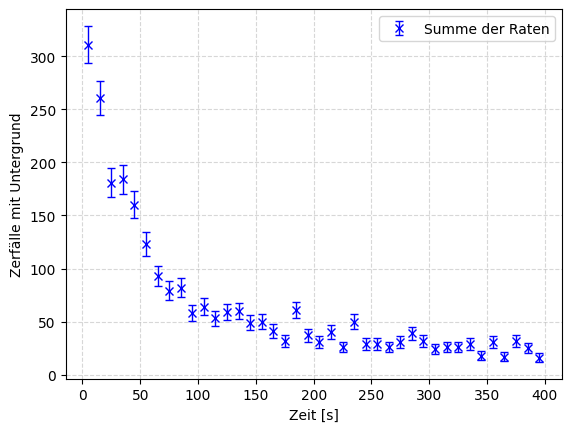

In [71]:
t = np.arange(5,405, 10)

plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(t, N, yerr=dN, fmt='x', color='blue', label='Summe der Raten', capsize=3, lw=1)
plt.xlabel(r'Zeit [s]')
plt.ylabel(r'Zerfälle mit Untergrund')
#plt.plot(X, linfit(X, *a1_popt_ac_680), color='lime', 
#        label="\n".join([r"Fitgerade: $y = \alpha \cdot x + \beta$", 
#                          r'$\alpha ={:.1f}\pm{:.1}$'.format(a1_popt_ac_680[0], np.sqrt(a1_pcov_ac_680[0][0])), 
#                          r'$\beta ={:.3f}\pm{:.3f}$'.format(a1_popt_ac_680[1], np.sqrt(a1_pcov_ac_680[1][1]))]))
plt.legend()

In [72]:
y0 = ug_mw
def exp(x, A1, l1, A2, l2):
    return A1 * np.exp(- x * l1) + A2 * np.exp(-x * l2) + y0
s1_pop, s1_cov = curve_fit(exp, t, N, p0=[500, 0.02, 50, 0.001], sigma=dN, absolute_sigma=True)

print("A1=",s1_pop[0], ", Standardfehler=", np.sqrt(s1_cov[0][0]))
print("l1=",s1_pop[1], ", Standardfehler=", np.sqrt(s1_cov[1][1]))
print("A2=",s1_pop[2], ", Standardfehler=", np.sqrt(s1_cov[2][2]))
print("l2=",s1_pop[3], ", Standardfehler=", np.sqrt(s1_cov[3][3]))

l1 = s1_pop[1]
dl1 = np.sqrt(s1_cov[1][1])
l2 = s1_pop[3]
dl2 = np.sqrt(s1_cov[3][3])

A1= 273.20338265849466 , Standardfehler= 21.160044268071253
l1= 0.02977712557206005 , Standardfehler= 0.004253726554796002
A2= 66.94410282445499 , Standardfehler= 19.99547056883678
l2= 0.005907494013643605 , Standardfehler= 0.0011985048945004134


chi2 = 52.473667233977125
chi2_red = 1.4576018676104756
Wahrscheinlichkeit = 4.0 %


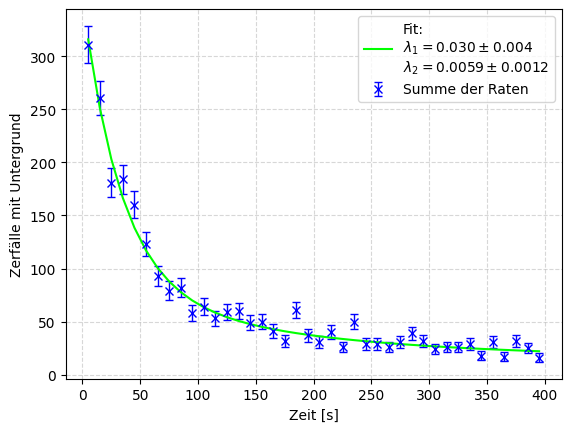

In [73]:
t = np.arange(5,405, 10)

plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(t, N, yerr=dN, fmt='x', color='blue', label='Summe der Raten', capsize=3, lw=1)
plt.xlabel(r'Zeit [s]')
plt.ylabel(r'Zerfälle mit Untergrund')
plt.plot(t, exp(t, *s1_pop), color='lime', 
        label="\n".join([r"Fit:", 
                          r'$\lambda_{} ={:.3f}\pm{:.3f}$'.format('1', s1_pop[1], np.sqrt(s1_cov[1][1])), 
                          r'$\lambda_{} ={:.4f}\pm{:.4f}$'.format('2', s1_pop[3], np.sqrt(s1_cov[3][3]))]))
plt.legend()
plt.savefig('./plots/Silber_mit_UG.pdf', format='PDF')

#Fitcheck
chi_2 = np.sum((exp(t,*s1_pop) - N)**2 /dN**2)
dof = len(N) - 4 #dof:degrees of freedom, Freiheitsgrad
chi2_red = chi_2/dof
print("chi2 =", chi_2)
print("chi2_red =",chi2_red)
prob = round(1-chi2.cdf(chi_2,dof),2)*100
print("Wahrscheinlichkeit =", prob,"%")

In [74]:
y0 = ug_mw - ug_dmw
s2_pop, s2_cov = curve_fit(exp, t, N, p0=[500, 0.02, 50, 0.001], sigma=dN, absolute_sigma=True)

print("A1=",s2_pop[0], ", Standardfehler=", np.sqrt(s2_cov[0][0]))
print("l1=",s2_pop[1], ", Standardfehler=", np.sqrt(s2_cov[1][1]))
print("A2=",s2_pop[2], ", Standardfehler=", np.sqrt(s2_cov[2][2]))
print("l2=",s2_pop[3], ", Standardfehler=", np.sqrt(s2_cov[3][3]))

l1m = s2_pop[1]
dl1m = np.sqrt(s2_cov[1][1])
l2m = s2_pop[3]
dl2m = np.sqrt(s2_cov[3][3])

A1= 275.8716137602503 , Standardfehler= 20.21726960544724
l1= 0.029493262039445602 , Standardfehler= 0.004020363055628029
A2= 65.14069094119769 , Standardfehler= 18.265484797231323
l2= 0.005497506893630588 , Standardfehler= 0.001106710894171423


chi2 = 52.306929117782545
chi2_red = 1.4529702532717375
Wahrscheinlichkeit = 4.0 %


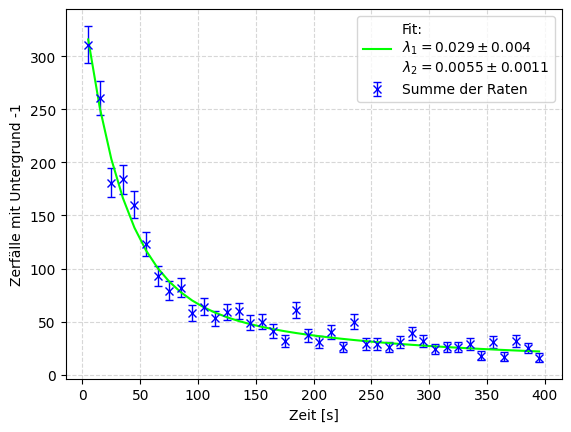

In [75]:
t = np.arange(5,405, 10)

plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(t, N, yerr=dN, fmt='x', color='blue', label='Summe der Raten', capsize=3, lw=1)
plt.xlabel(r'Zeit [s]')
plt.ylabel(r'Zerfälle mit Untergrund -1')
plt.plot(t, exp(t, *s2_pop), color='lime', 
        label="\n".join([r"Fit:", 
                          r'$\lambda_{} ={:.3f}\pm{:.3f}$'.format('1', s2_pop[1], np.sqrt(s2_cov[1][1])), 
                          r'$\lambda_{} ={:.4f}\pm{:.4f}$'.format('2', s2_pop[3], np.sqrt(s2_cov[3][3]))]))
plt.legend()
plt.savefig('./plots/Silber_mit_UG-1.pdf', format='PDF')

#Fitcheck
chi_2 = np.sum((exp(t,*s2_pop) - N)**2 /dN**2)
dof = len(N) - 4 #dof:degrees of freedom, Freiheitsgrad
chi2_red = chi_2/dof
print("chi2 =", chi_2)
print("chi2_red =",chi2_red)
prob = round(1-chi2.cdf(chi_2,dof),2)*100
print("Wahrscheinlichkeit =", prob,"%")

In [76]:
y0 = ug_mw + ug_dmw
s3_pop, s3_cov = curve_fit(exp, t, N, p0=[500, 0.02, 50, 0.001], sigma=dN, absolute_sigma=True)

print("A1=",s3_pop[0], ", Standardfehler=", np.sqrt(s3_cov[0][0]))
print("l1=",s3_pop[1], ", Standardfehler=", np.sqrt(s3_cov[1][1]))
print("A2=",s3_pop[2], ", Standardfehler=", np.sqrt(s3_cov[2][2]))
print("l2=",s3_pop[3], ", Standardfehler=", np.sqrt(s3_cov[3][3]))

l1p = s3_pop[1]
dl1p = np.sqrt(s3_cov[1][1])
l2p = s3_pop[3]
dl2p = np.sqrt(s3_cov[3][3])

A1= 269.9621392034454 , Standardfehler= 22.438095483720453
l1= 0.03010727479762373 , Standardfehler= 0.0045444916051667035
A2= 69.32741599674702 , Standardfehler= 22.15348902417644
l2= 0.006374707676434155 , Standardfehler= 0.0013063042470345188


chi2 = 52.6853292794104
chi2_red = 1.463481368872511
Wahrscheinlichkeit = 4.0 %


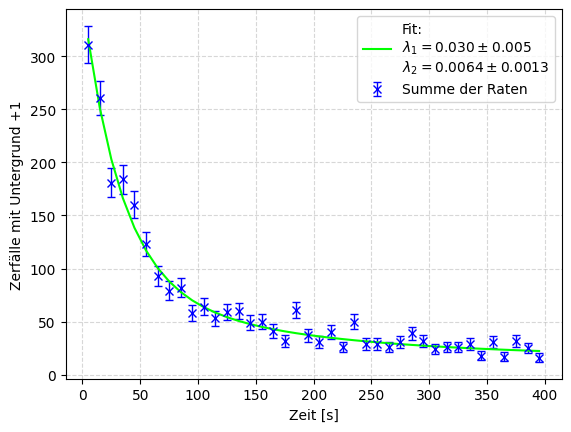

In [77]:
t = np.arange(5,405, 10)

plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(t, N, yerr=dN, fmt='x', color='blue', label='Summe der Raten', capsize=3, lw=1)
plt.xlabel(r'Zeit [s]')
plt.ylabel(r'Zerfälle mit Untergrund +1')
plt.plot(t, exp(t, *s3_pop), color='lime', 
        label="\n".join([r"Fit:", 
                          r'$\lambda_{} ={:.3f}\pm{:.3f}$'.format('1', s3_pop[1], np.sqrt(s3_cov[1][1])), 
                          r'$\lambda_{} ={:.4f}\pm{:.4f}$'.format('2', s3_pop[3], np.sqrt(s3_cov[3][3]))]))
plt.legend()
plt.savefig('./plots/Silber_mit_UG+1.pdf', format='PDF')

#Fitcheck
chi_2 = np.sum((exp(t,*s3_pop) - N)**2 /dN**2)
dof = len(N) - 4 #dof:degrees of freedom, Freiheitsgrad
chi2_red = chi_2/dof
print("chi2 =", chi_2)
print("chi2_red =",chi2_red)
prob = round(1-chi2.cdf(chi_2,dof),2)*100
print("Wahrscheinlichkeit =", prob,"%")

In [78]:
diff1m = np.abs(l1 - l1m)
diff1p = np.abs(l1 - l1p)

diff1 = np.mean([diff1m, diff1p])

diff2m = np.abs(l2 - l2m)
diff2p = np.abs(l2 - l2p)

diff2 = np.mean([diff2m, diff2p])

In [79]:
l1 = l1
dl1 = np.sqrt(dl1**2 + diff1**2)

l2 = l2
dl2 = np.sqrt(dl2**2 + diff2**2)

print("Zerfallskonstante 1 = ({} +/- {})".format(l1, dl1))
print("Zerfallskonstante 2 = ({} +/- {})".format(l2, dl2))

Zerfallskonstante 1 = (0.02977712557206005 +/- 0.004264791028852181)
Zerfallskonstante 2 = (0.005907494013643605 +/- 0.0012762383341207255)


In [80]:
T1 = np.log(2)/l1
dT1 = T1 * np.sqrt((dl1/l1)**2)

T2 = np.log(2)/l2
dT2 = T2 * np.sqrt((dl2/l2)**2)

print("Halbwertszeit 1 = ({} +/- {})".format(T1, dT1))
print("Halbwertszeit 2 = ({} +/- {})".format(T2, dT2))

Halbwertszeit 1 = (23.27784053173779 +/- 3.333939175242526)
Halbwertszeit 2 = (117.33353922307714 +/- 25.348406665957704)


In [81]:
T1_lit = 24.6
T2_lit = 144.6

_ = sigma(T1, T1_lit, dT1, 0, 'Halbwertszeit 1')
_ = sigma(T2, T2_lit, dT2, 0, 'Halbwertszeit 2')

Sigmaabweichung Halbwertszeit 1 = 0.3965757618136601
Sigmaabweichung Halbwertszeit 2 = 1.0756676400312393


# Indiumzerfall

In [82]:
ug_i = ug_mw * 3
ug_di = ug_dmw * 3

In [83]:
T_ind, Ni = np.loadtxt('data/indium.txt', skiprows=4, delimiter=',', unpack=True)
dNi = np.sqrt(Ni)

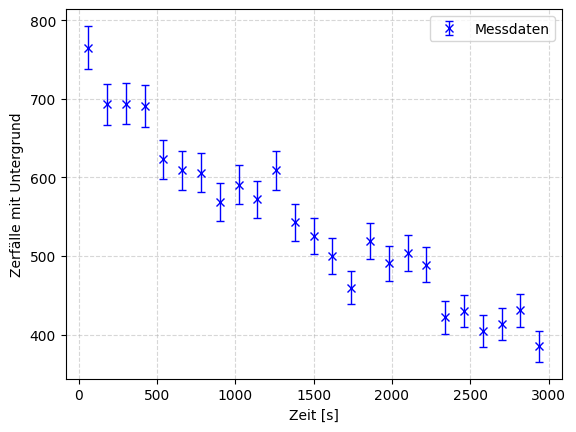

In [84]:
t = np.arange(60,3060,120)

plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(t, Ni, yerr=dNi, fmt='x', color='blue', label='Messdaten', capsize=3, lw=1)
plt.xlabel(r'Zeit [s]')
plt.ylabel(r'Zerfälle mit Untergrund')
#plt.plot(X, linfit(X, *a1_popt_ac_680), color='lime', 
#        label="\n".join([r"Fitgerade: $y = \alpha \cdot x + \beta$", 
#                          r'$\alpha ={:.1f}\pm{:.1}$'.format(a1_popt_ac_680[0], np.sqrt(a1_pcov_ac_680[0][0])), 
#                          r'$\beta ={:.3f}\pm{:.3f}$'.format(a1_popt_ac_680[1], np.sqrt(a1_pcov_ac_680[1][1]))]))
plt.legend()

In [85]:
def exp2(x,A,l):
    return A * np.exp(-x*l) + y0

In [86]:
y0 = ug_i
i1_pop, i1_cov = curve_fit(exp2, t[1:], Ni[1:], p0=[500, 0.0002], sigma=dNi[1:], absolute_sigma=True)

print("A=",i1_pop[0], ", Standardfehler=", np.sqrt(i1_cov[0][0]))
print("l=",i1_pop[1], ", Standardfehler=", np.sqrt(i1_cov[1][1]))

li = i1_pop[1]
dli = np.sqrt(i1_cov[1][1])

A= 674.8062732895619 , Standardfehler= 12.917666736826769
l= 0.00022342259049030073 , Standardfehler= 1.1838945894853908e-05


chi2 = 24.805606637027854
chi2_red = 1.127527574410357
Wahrscheinlichkeit = 31.0 %


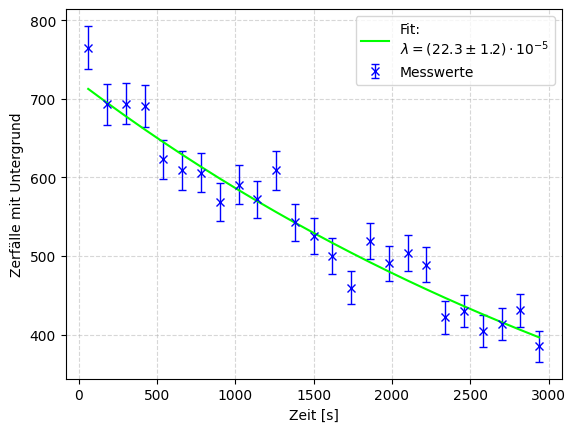

In [87]:
t = np.arange(60,3060,120)

plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(t, Ni, yerr=dNi, fmt='x', color='blue', label='Messwerte', capsize=3, lw=1)
plt.xlabel(r'Zeit [s]')
plt.ylabel(r'Zerfälle mit Untergrund')
plt.plot(t, exp2(t, *i1_pop), color='lime', 
        label="\n".join([r"Fit:", 
                          r'$\lambda =({:.1f}\pm{:.1f}) \cdot 10^{}$'.format(i1_pop[1] * 1e5, np.sqrt(i1_cov[1][1]) * 1e5, '{-5}')]))
plt.legend()
plt.savefig('./plots/Indium_mit_UG.pdf', format='PDF')

#Fitcheck
chi_2 = np.sum((exp2(t[1:],*i1_pop) - Ni[1:])**2 /dNi[1:]**2)
dof = len(Ni[1:]) - 2 #dof:degrees of freedom, Freiheitsgrad
chi2_red = chi_2/dof
print("chi2 =", chi_2)
print("chi2_red =",chi2_red)
prob = round(1-chi2.cdf(chi_2,dof),2)*100
print("Wahrscheinlichkeit =", prob,"%")

In [88]:
y0 = ug_i - ug_di
i2_pop, i2_cov = curve_fit(exp2, t[1:], Ni[1:], p0=[500, 0.0002], sigma=dNi[1:], absolute_sigma=True)

print("A=",i2_pop[0], ", Standardfehler=", np.sqrt(i2_cov[0][0]))
print("l=",i2_pop[1], ", Standardfehler=", np.sqrt(i2_cov[1][1]))

lim = i2_pop[1]
dlim = np.sqrt(i2_cov[1][1])

A= 678.0136906417098 , Standardfehler= 12.900931727309121
l= 0.00022185611816818426 , Standardfehler= 1.1753511837010672e-05


chi2 = 24.804530106461538
chi2_red = 1.1274786412027973
Wahrscheinlichkeit = 31.0 %


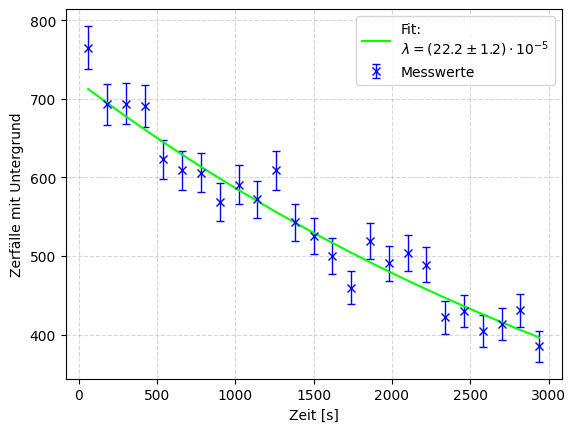

In [89]:
t = np.arange(60,3060,120)

plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(t, Ni, yerr=dNi, fmt='x', color='blue', label='Messwerte', capsize=3, lw=1)
plt.xlabel(r'Zeit [s]')
plt.ylabel(r'Zerfälle mit Untergrund')
plt.plot(t, exp2(t, *i2_pop), color='lime', 
        label="\n".join([r"Fit:", 
                          r'$\lambda =({:.1f}\pm{:.1f}) \cdot 10^{}$'.format(i2_pop[1] * 1e5, np.sqrt(i2_cov[1][1]) * 1e5, '{-5}')]))
plt.legend()
plt.savefig('./plots/Indium_mit_UG-1.pdf', format='PDF')

#Fitcheck
chi_2 = np.sum((exp2(t[1:],*i2_pop) - Ni[1:])**2 /dNi[1:]**2)
dof = len(Ni[1:]) - 2 #dof:degrees of freedom, Freiheitsgrad
chi2_red = chi_2/dof
print("chi2 =", chi_2)
print("chi2_red =",chi2_red)
prob = round(1-chi2.cdf(chi_2,dof),2)*100
print("Wahrscheinlichkeit =", prob,"%")

In [90]:
y0 = ug_i + ug_di
i3_pop, i3_cov = curve_fit(exp2, t[1:], Ni[1:], p0=[500, 0.0002], sigma=dNi[1:], absolute_sigma=True)

print("A=",i3_pop[0], ", Standardfehler=", np.sqrt(i3_cov[0][0]))
print("l=",i3_pop[1], ", Standardfehler=", np.sqrt(i3_cov[1][1]))

lip = i3_pop[1]
dlip = np.sqrt(i3_cov[1][1])

A= 671.6011821783825 , Standardfehler= 12.934649820289511
l= 0.00022501119626819482 , Standardfehler= 1.1925658317947085e-05


chi2 = 24.80693417316548
chi2_red = 1.1275879169620673
Wahrscheinlichkeit = 31.0 %


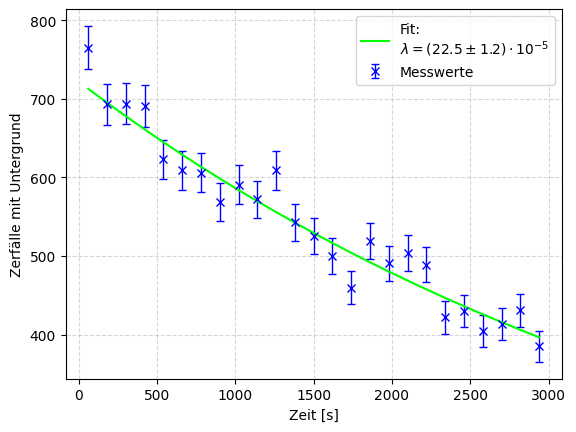

In [91]:
t = np.arange(60,3060,120)

plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(t, Ni, yerr=dNi, fmt='x', color='blue', label='Messwerte', capsize=3, lw=1)
plt.xlabel(r'Zeit [s]')
plt.ylabel(r'Zerfälle mit Untergrund')
plt.plot(t, exp2(t, *i3_pop), color='lime', 
        label="\n".join([r"Fit:", 
                          r'$\lambda =({:.1f}\pm{:.1f}) \cdot 10^{}$'.format(i3_pop[1] * 1e5, np.sqrt(i3_cov[1][1]) * 1e5, '{-5}')]))
plt.legend()
plt.savefig('./plots/Indium_mit_UG+1.pdf', format='PDF')

#Fitcheck
chi_2 = np.sum((exp2(t[1:],*i3_pop) - Ni[1:])**2 /dNi[1:]**2)
dof = len(Ni[1:]) - 2 #dof:degrees of freedom, Freiheitsgrad
chi2_red = chi_2/dof
print("chi2 =", chi_2)
print("chi2_red =",chi2_red)
prob = round(1-chi2.cdf(chi_2,dof),2)*100
print("Wahrscheinlichkeit =", prob,"%")

In [92]:
diffim = np.abs(li - lim)
diffip = np.abs(li - lip)

diffi = np.mean([diffim, diffip])

li = li
dli = np.sqrt(dli**2 + diffi**2)

print("Zerfallskonstante Indium = ({} +/- {})".format(li, dli))

Ti = np.log(2)/li
dTi = Ti * np.sqrt((dli/li)**2)

print("Halbwertszeit Indium = ({} +/- {})".format(Ti, dTi))

Zerfallskonstante Indium = (0.00022342259049030073 +/- 1.1943586955164254e-05)
Halbwertszeit Indium = (3102.4041885775036 +/- 165.84640843625795)


In [93]:
Ti_lit = 54 * 60
_ = sigma(Ti, Ti_lit, dTi, 0, 'Halbwertszeit Indium')

Sigmaabweichung Halbwertszeit Indium = 0.8296580717054266


# Tabellen für die Auswertung

In [94]:
head = ['Time', 'N_ug']
tab = zip(ug_t, ug_r)

#print(tabulate(tab, headers=head, tablefmt="latex"))

In [95]:
head = ['Time', 'N1', 'N2', 'N3', 'N4']
tab = zip(n1_t, n1, n2, n3, n4)

#print(tabulate(tab, headers=head, tablefmt="latex"))

In [96]:
head = ['Time', 'N_In']
tab = zip(T_ind, Ni)

#print(tabulate(tab, headers=head, tablefmt="latex"))